## Dependencies
***

In [10]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Data Sets
***

In [155]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA+Data.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


### DataFrame Cleaning/Manipulation
***

In [156]:
#preview DataFrames
#print(nba_data_df.count())
#print(height_weight_df.count())

In [157]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [158]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


#### Merged Data Frames

In [159]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,176.0,NaN,NaN,NaN,217.0,458.0,G-F,170,71,5ft 11in
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,77.0,NaN,NaN,NaN,97.0,202.0,G-F,170,71,5ft 11in
2,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,109.0,NaN,NaN,NaN,99.0,279.0,G,185,74,6ft 2in
3,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,115.0,NaN,NaN,NaN,98.0,152.0,G,185,74,6ft 2in
4,1952,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,...,70.0,NaN,NaN,NaN,56.0,126.0,G,185,74,6ft 2in


### Cleaning Data Frame: 'complete_df'

In [160]:
#remove 'unnamed' and 'position' columns

complete_df = merged_df.drop(["position"],axis=1)
complete_df = complete_df.sort_values(by="Year")


In [161]:
#Conditional function to isolate big men and small men

def f(row):
    if row['Pos'] == 'C' or row['Pos'] == 'F' or row['Pos'] == 'C-F' or row['Pos'] == 'F-C' or row ['Pos'] == 'PF':
        val = 'bm'
    else:
        val = 'sm'
    return val
complete_df['men'] = complete_df.apply(f, axis = 1)

In [163]:
#Clean complete df further

complete_df = complete_df.reset_index()
complete_df = complete_df.drop(['index'],axis=1)

#complete_df.head()

##--Year Filter--#

year_filter = (complete_df.Year >= 1990)
complete_df = complete_df[year_filter]
complete_df.head()


,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,weight,height (inches),height(feet),men
0,1990,Mike Smrek,C,27.0,GSW,13.0,3.0,107.0,7.1,0.394,...,1.0,4.0,11.0,9.0,18.0,21.0,250,85,7ft 1in,bm
1,1990,Jay Humphries,PG,27.0,MIL,81.0,81.0,2818.0,16.4,0.547,...,472.0,156.0,11.0,151.0,253.0,1237.0,185,75,6ft 3in,sm
2,1990,A.C. Green,PF,26.0,LAL,82.0,82.0,2709.0,14.7,0.548,...,90.0,66.0,50.0,116.0,207.0,1061.0,220,81,6ft 9in,bm
3,1990,Ron Harper,SG,26.0,LAC,28.0,28.0,1105.0,20.0,0.553,...,133.0,67.0,32.0,82.0,80.0,644.0,185,78,6ft 6in,sm
4,1990,Gerald Henderson,PG,34.0,TOT,57.0,0.0,464.0,11.9,0.584,...,74.0,16.0,2.0,24.0,50.0,135.0,215,77,6ft 5in,sm


### Cleaning Big Men and Small Men DataFrames

In [207]:
#isolate big men and small men and store them in: big_men_df and small_men_df respectively

#--big men--#
big_men_df = complete_df.loc[complete_df['men']=='bm']

#--small men--#
small_men_df = complete_df.loc[complete_df['men']=='sm']

#Test print both: big_men_df and small_men_df

big_men_df.head()
#small_men_df.head()
big_men_df.columns

Index(['Year', 'name', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'weight', 'height (inches)', 'height(feet)',
       'men'],
      dtype='object')

In [169]:
#----Isolating Big Men Into Sub-groups by year----#

big_men_grouped = big_men_df.groupby('Year')

#---Isolating Small Men Into Sub-groups by year---#

small_men_grouped = small_men_df.groupby('Year')

big_men_grouped.get_group(1990)



,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,weight,height (inches),height(feet),men
0,1990,Mike Smrek,C,27.0,GSW,13.0,3.0,107.0,7.1,0.394,...,1.0,4.0,11.0,9.0,18.0,21.0,250,85,7ft 1in,bm
2,1990,A.C. Green,PF,26.0,LAL,82.0,82.0,2709.0,14.7,0.548,...,90.0,66.0,50.0,116.0,207.0,1061.0,220,81,6ft 9in,bm
5,1990,Kenny Walker,PF,25.0,NYK,68.0,21.0,1595.0,12.7,0.581,...,49.0,33.0,52.0,60.0,178.0,535.0,210,80,6ft 8in,bm
8,1990,Derrick Gervin,PF,26.0,NJN,21.0,0.0,339.0,22.9,0.531,...,8.0,20.0,7.0,12.0,47.0,251.0,200,80,6ft 8in,bm
12,1990,Melvin Turpin,C,29.0,WSB,59.0,12.0,818.0,12.8,0.574,...,27.0,15.0,47.0,45.0,135.0,276.0,240,83,6ft 11in,bm
15,1990,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,0.510,...,142.0,60.0,39.0,101.0,219.0,860.0,217,80,6ft 8in,bm
16,1990,William Bedford,C,26.0,DET,42.0,0.0,246.0,9.5,0.438,...,4.0,3.0,17.0,21.0,39.0,118.0,225,85,7ft 1in,bm
17,1990,Detlef Schrempf,PF,27.0,IND,78.0,18.0,2573.0,17.6,0.611,...,247.0,59.0,16.0,180.0,271.0,1267.0,214,81,6ft 9in,bm
18,1990,Jim Petersen,C,27.0,GSW,43.0,19.0,592.0,9.0,0.497,...,23.0,17.0,20.0,36.0,103.0,172.0,235,82,6ft 10in,bm
19,1990,Pat Cummings,C,33.0,MIA,37.0,1.0,391.0,10.5,0.499,...,13.0,12.0,4.0,32.0,60.0,175.0,230,81,6ft 9in,bm


###  Exploratory Data Analysis
***


### Overview of Big Men
***

#### Field Goals Attempted
***

In [194]:
#Total Field Gaols attempted for both big men and small men

#---Big Men---#

fga_big = big_men_grouped.FGA.mean()
fga_big

#Turn into DataFrame

fga_big = fga_big.to_frame()


#Reset index of DataFrame
fga_big  = fga_big.reset_index()
fga_big.head()


,Year,FGA
0,1990,370.117318
1,1991,356.291209
2,1992,375.722892
3,1993,334.796875
4,1994,300.638095


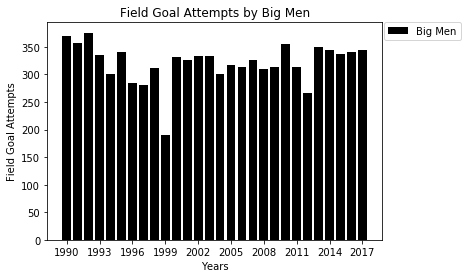

In [192]:
#Big Men FGA Graphical
fga_big_plot = plt.bar(fga_big["Year"], fga_big["FGA"], color='Black')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([fga_big_plot], ["Big Men"], loc='best', bbox_to_anchor = (1.25,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Field Goal Attempts")
plt.title("Field Goal Attempts by Big Men")


plt.show()

#### Field Goal Percentage 
***

In [197]:
#---Big Men---#

fgp_big = big_men_grouped['FG%'].mean()
fgp_big

#Turn into DataFrame

fgp_big = fgp_big.to_frame()


#Reset index of DataFrame
fgp_big  = fgp_big.reset_index()
fgp_big.head()


,Year,FG%
0,1990,0.454268
1,1991,0.469188
2,1992,0.469445
3,1993,0.464161
4,1994,0.454101


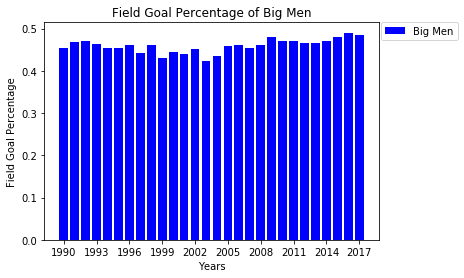

In [205]:
#Big Men Field Goal Percentage Graphical
fgp_big_plot = plt.bar(fgp_big["Year"], fgp_big["FG%"], color='Blue')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([fgp_big_plot], ["Big Men"], loc='best', bbox_to_anchor = (1.25,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Field Goal Percentage")
plt.title("Field Goal Percentage of Big Men")


plt.show()

#### Two Points Attempted 
***

In [208]:
#---Big Men---#

two_att_big = big_men_grouped['2PA'].mean()
two_att_big

#Turn into DataFrame

two_att_big = two_att_big.to_frame()


#Reset index of DataFrame
two_att_big  = two_att_big.reset_index()
two_att_big.head()

,Year,2PA
0,1990,359.245810
1,1991,347.807692
2,1992,366.542169
3,1993,323.291667
4,1994,290.795238


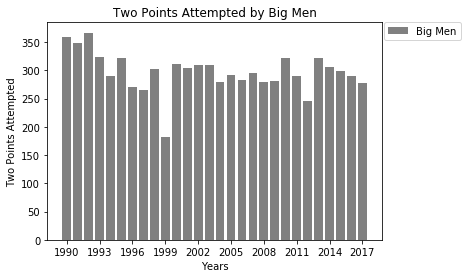

In [212]:
#Big Men Field Goal Percentage Graphical
two_att_big_plot = plt.bar(two_att_big["Year"], two_att_big["2PA"], color='Grey')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([two_att_big_plot], ["Big Men"], loc='best', bbox_to_anchor = (1.25,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Two Points Attempted")
plt.title("Two Points Attempted by Big Men")


plt.show()

#### Free Throws Attempted
***

In [190]:
#---Big Men---#

fta_big = big_men_grouped.FGA.mean()
fta_big

#Turn into DataFrame

fta_big = fta_big.to_frame()


#Reset index of DataFrame
fta_big  = fta_big.reset_index()
fta_big.head()

,Year,FGA
0,1990,370.117318
1,1991,356.291209
2,1992,375.722892
3,1993,334.796875
4,1994,300.638095


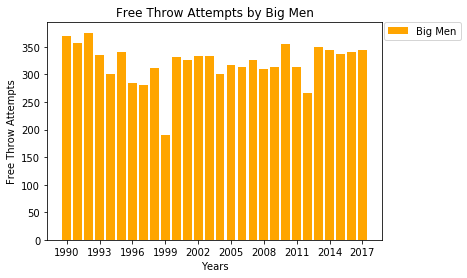

In [202]:
#Big Men Free Throws Graphical
fta_big_plot = plt.bar(fta_big["Year"], fta_big["FGA"], color='Orange')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([fta_big_plot], ["Big Men"], loc='best', bbox_to_anchor = (1.25,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Free Throw Attempts")
plt.title("Free Throw Attempts by Big Men")


plt.show()

#### Average minutes played 
***

In [171]:
#Get the average minutes played for both big men and small men

#---Big Men---#

avg_min_big = big_men_grouped.MP.mean()
avg_min_big

#Turn into DataFrame

avg_min_big = avg_min_big.to_frame()


#Reset index of DataFrame
avg_min_big = avg_min_big.reset_index()
print(avg_min_big.head())


#---Small Men---#
avg_min_small = small_men_grouped.MP.mean()
avg_min_small = avg_min_small.to_frame()
avg_min_small = avg_min_small.reset_index()
avg_min_small.head()

   Year           MP
0  1990  1172.078212
1  1991  1161.230769
2  1992  1196.650602
3  1993  1045.364583
4  1994   960.542857


,Year,MP
0,1990,1140.823308
1,1991,1270.774590
2,1992,1117.505376
3,1993,1305.197479
4,1994,1254.562992


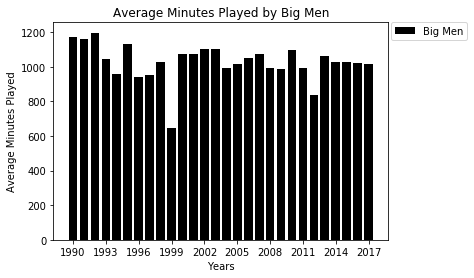

In [177]:
#Big Men Minutes


big_plot = plt.bar(avg_min_big["Year"], avg_min_big["MP"], color='Black')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([big_plot], ["Big Men"], loc='best', bbox_to_anchor = (1.25,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Big Men")


plt.show()

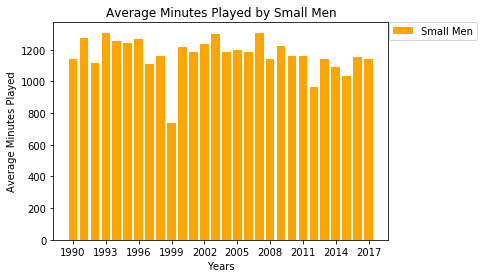

In [178]:
#Small Men Minutes

small_plot = plt.bar(avg_min_small["Year"], avg_min_small["MP"], color='Orange')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([small_plot], ["Small Men"], loc='outside', bbox_to_anchor = (1.28,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Small Men")

plt.show()

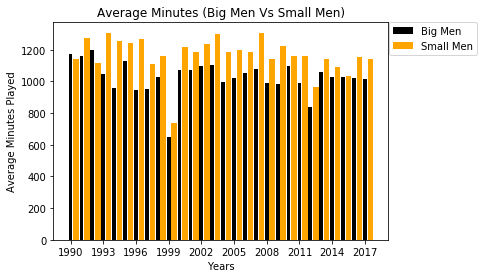

In [181]:
#all Together
big_plot = plt.bar(avg_min_big["Year"], avg_min_big["MP"], color='Black',width = 0.35)
small_plot = plt.bar(avg_min_small["Year"] + 0.5, avg_min_small["MP"], color='Orange',width = 0.5)



#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([big_plot,small_plot], ["Big Men","Small Men"], loc='outside', bbox_to_anchor = (1.28,1.025))

plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes (Big Men Vs Small Men)")

plt.show()

###  Statistical Data Analysis
***